# ANÁLISIS DE SENTIMIENTO DE USUARIOS EN TWITTER EN ESPAÑOL SOBRE LAS TECNOLOGÍAS APLICANDO TEXT MINING

# INSTALACIÓN DE LIBRERIAS CON PIP INSTALL

In [ ]:
# Instalacion de la libreria Twint de GitHub
#!pip install --user --upgrade -e git+https://github.com/twintproject/twint.git#egg=twint
!pip install --upgrade git+https://github.com/twintproject/twint.git@origin/master#egg=twint
#!pip uninstall twint
#!pip install git+git://github.com/ajctrl/twint@patch-1


  Cloning https://github.com/twintproject/twint.git (to revision origin/master) to /tmp/pip-install-9bkhpz1h/twint_cc73c354991647558ac99064629aa3d8
  Running command git clone --filter=blob:none --quiet https://github.com/twintproject/twint.git /tmp/pip-install-9bkhpz1h/twint_cc73c354991647558ac99064629aa3d8
  Running command git checkout -q origin/master
  Resolved https://github.com/twintproject/twint.git to commit origin/master
  Preparing metadata (setup.py) ... done
  Created wheel for twint: filename=twint-2.1.21-py3-none-any.whl size=38849 sha256=31c55a6c8f48f33ed88666ea688d67d8a144c6018bcd50d850921e77794ef453
  Stored in directory: /tmp/pip-ephem-wheel-cache-uy5uulf6/wheels/82/53/6a/1748715999869633a137492ae93351d1c6a41e642549f7a822
Successfully built twint


In [ ]:
!pip install torch

In [ ]:
!pip install tensorflow

In [ ]:
# Instalacion de la libreria Pipeline
!pip install pipeline

In [ ]:
# Instalacion de la libreria Transformers
!pip install transformers

# IMPORTAR LIBRERÍAS

In [ ]:
#Para manejo de DataFrames
import pandas as pd

#Para manejo de matrices
import numpy as np

#Para dibujar graficas
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

#Para manejo de fechas y horas
from datetime import date, timedelta

#Para extraccion de datos de Twitter
import twint

#Cuando se ejecute la libreria Twint en Jupyter aparece el siguiente error
# -> RuntimeError: This event loop is already running
#Para solucionar este problema podemos en insertar la libreria anest_asyncio
import nest_asyncio
nest_asyncio.apply()

#Para el procesamiento del lenguaje natural
import nltk
nltk.download('popular')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

#Para encontrar expresiones regulares tales como caracteres
#especiales o del alfabeto
import re

#Para construir aplicaciones de procesamiento de lenguaje
#natural (NLP) Lematizacion
import spacy

#Para el analisis de sentimientos
from transformers import pipeline

import collections
import itertools

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

# CONFIGURACIÓN Y APLICACIÓN DE FILTROS EN TWINT PARA BÚSQUEDA EN TWITTER

In [ ]:
# Configuracion
c = twint.Config()

c.Search = "Tecnologia" #Para extraer unicamente los tweets que contengan esta palabra
c.Limit = 100000 #Para indicar el número máximo de tweets a recopilar
c.Since = "2023-01-01" #Para extraer los tweets que se han publicado desde la fecha que consideremos.
c.Pandas = True #Para poder almacenar los resultados en un Dataframe de la libería Pandas
#c.Elasticsearch = "http://localhost:9200"
twint.run.Search(c) #Empezar a buscar

#Parametros extraido de la documentacion: https://github.com/twintproject/twint/wiki/Configuration

RefreshTokenException: ignored

## Poner los Tweets en un Dataframe con Pandas

In [ ]:
# Funcion para poder ver las columnas del DataFrame extraido
def column_names():
    return twint.output.panda.Tweets_df.columns
#Funcion para guardar las columnas en un Dataframe
def twint_to_pd(columns):
    return twint.output.panda.Tweets_df[columns]

In [ ]:
#Vemos todas las columnas
print(column_names())

Index(['id', 'conversation_id', 'created_at', 'date', 'timezone', 'place',
       'tweet', 'language', 'hashtags', 'cashtags', 'user_id', 'user_id_str',
       'username', 'name', 'day', 'hour', 'link', 'urls', 'photos', 'video',
       'thumbnail', 'retweet', 'nlikes', 'nreplies', 'nretweets', 'quote_url',
       'search', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')


In [ ]:
# Guardamos todas los datos en un DataFrame
tweet_df = twint_to_pd(['id', 'conversation_id', 'created_at', 'date', 'timezone', 'place',
       'tweet', 'language', 'hashtags', 'cashtags', 'user_id', 'user_id_str',
       'username', 'name', 'day', 'hour', 'link', 'urls', 'photos', 'video',
       'thumbnail', 'retweet', 'nlikes', 'nreplies', 'nretweets', 'quote_url',
       'search', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'])

In [ ]:
#Imprimimos el DataFrame
tweet_df

id      conversation_id    created_at  \
0      1594495738276356096  1594495738276356096  1.668992e+12   
1      1594495654851641344  1594448976564129795  1.668992e+12   
2      1594495654679793664  1594495654679793664  1.668992e+12   
3      1594495644516900864  1594495644516900864  1.668992e+12   
4      1594495590011764737  1594495590011764737  1.668992e+12   
...                    ...                  ...           ...   
85059  1591419811166552064  1591419811166552064  1.668259e+12   
85060  1591419789167452161  1591419789167452161  1.668259e+12   
85061  1591419621906972676  1591419621906972676  1.668259e+12   
85062  1591419497017184259  1591419497017184259  1.668259e+12   
85063  1591418704822255619  1591242569593356289  1.668259e+12   

                      date timezone place  \
0      2022-11-20 19:59:42    -0500         
1      2022-11-20 19:59:23    -0500         
2      2022-11-20 19:59:23    -0500         
3      2022-11-20 19:59:20    -0500         
4      2022-11-20 19:59:07    -0500         
...                    ...      ...   ...   
85059  2022-11-12 08:17:04    -0500         
85060  2022-11-12 08:16:59    -0500         
85061  2022-11-12 08:16:19    -0500         
85062  2022-11-12 08:15:49    -0500         
85063  2022-11-12 08:12:41    -0500         

                                                   tweet language  \
0      "🎱 Tecnología móvil: qué es, desarrollo, usos ...       es   
1      @YanethAguirre Jack el saltarin le llaman un d...       es   
2      En Reforma Agraria, POES recupera vehículo que...       es   
3      Pregunta: ¿Qué tecnología quieres aprender par...       es   
4      No se que es mejor si el efecto o que hace car...       es   
...                                                  ...      ...   
85059  HONOR 70 | Review en Español  https://t.co/W1D...       es   
85060  Hola chicos. ¿Volvemos a las papeletas y el vo...       es   
85061  #tecnología #apple #tech - ¿Tienes textos guar...       es   
85062  Reconoció #COPOCYT a investigadores de la #UAS...       es   
85063  @GNBCmdtGral @NestorLReverol @PresidencialVen ...       es   

                        hashtags cashtags  ...  geo source user_rt_id user_rt  \
0                             []       []  ...                                  
1                             []       []  ...                                  
2                             []       []  ...                                  
3                             []       []  ...                                  
4                             []       []  ...                                  
...                          ...      ...  ...  ...    ...        ...     ...   
85059                         []       []  ...                                  
85060                         []       []  ...                                  
85061  [tecnología, apple, tech]       []  ...                                  
85062           [copocyt, uaslp]       []  ...                                  
85063                         []       []  ...                                  

       retweet_id                                           reply_to  \
0                                                                 []   
1                  [{'screen_name': 'YanethAguirre', 'name': '▀▄▀...   
2                                                                 []   
3                                                                 []   
4                                                                 []   
...           ...                                                ...   
85059                                                             []   
85060                                                             []   
85061                                                             []   
85062                                                             []   
85063              [{'screen_name': 'GNBCmdtGral', 'name': 'MG Ju...   

      retweet_date translate trans_

In [ ]:
#Vemos el total de filas del datalake
tweet_df.shape

(85064, 38)

In [ ]:
#Guardamos el DataLake en un csv
tweet_df.to_csv("DataLake.csv", index=False)

## Utilizando Columnas Necesarias

In [ ]:
# Utilizamos columnas especificas
tweet_df = twint_to_pd(["date","username","language","tweet","nlikes"])

In [ ]:
#Imprimimos el DataFrame
tweet_df

date        username language  \
0      2022-11-20 19:59:42       Flipa_net       es   
1      2022-11-20 19:59:23    DRDESTRUCTO7       es   
2      2022-11-20 19:59:23         poesqro       es   
3      2022-11-20 19:59:20        oscaruhp       es   
4      2022-11-20 19:59:07        Mel_EICS       es   
...                    ...             ...      ...   
85059  2022-11-12 08:17:04    TecnoBinaria       es   
85060  2022-11-12 08:16:59         Aubar77       es   
85061  2022-11-12 08:16:19   TeacherGrunon       es   
85062  2022-11-12 08:15:49      PoliciacaL       es   
85063  2022-11-12 08:12:41  2DACIADCR11511       es   

                                                   tweet  nlikes  
0      "🎱 Tecnología móvil: qué es, desarrollo, usos ...       0  
1      @YanethAguirre Jack el saltarin le llaman un d...       0  
2      En Reforma Agraria, POES recupera vehículo que...       0  
3      Pregunta: ¿Qué tecnología quieres aprender par...       0  
4      No se que es mejor si el efecto o que hace car...       0  
...                                                  ...     ...  
85059  HONOR 70 | Review en Español  https://t.co/W1D...       0  
85060  Hola chicos. ¿Volvemos a las papeletas y el vo...      65  
85061  #tecnología #apple #tech - ¿Tienes textos guar...       0  
85062  Reconoció #COPOCYT a investigadores de la #UAS...       0  
85063  @GNBCmdtGral @NestorLReverol @PresidencialVen ...       0  

[85064 rows x 5 columns]

In [ ]:
#Guardamos solo las columnas que vamos a utilizar en un csv
tweet_df.to_csv("DataTwitter.csv", index=False)

# LIMITAMOS EL DATALAKE A ESPAÑOL

In [ ]:
#Limitamos el dataframe a español (es)
tweet_esp = tweet_df[tweet_df['language']=='es']

In [ ]:
#Imprimimos el DataFrame
tweet_esp

date        username language  \
0      2022-11-20 19:59:42       Flipa_net       es   
1      2022-11-20 19:59:23    DRDESTRUCTO7       es   
2      2022-11-20 19:59:23         poesqro       es   
3      2022-11-20 19:59:20        oscaruhp       es   
4      2022-11-20 19:59:07        Mel_EICS       es   
...                    ...             ...      ...   
85059  2022-11-12 08:17:04    TecnoBinaria       es   
85060  2022-11-12 08:16:59         Aubar77       es   
85061  2022-11-12 08:16:19   TeacherGrunon       es   
85062  2022-11-12 08:15:49      PoliciacaL       es   
85063  2022-11-12 08:12:41  2DACIADCR11511       es   

                                                   tweet  nlikes  
0      "🎱 Tecnología móvil: qué es, desarrollo, usos ...       0  
1      @YanethAguirre Jack el saltarin le llaman un d...       0  
2      En Reforma Agraria, POES recupera vehículo que...       0  
3      Pregunta: ¿Qué tecnología quieres aprender par...       0  
4      No se que es mejor si el efecto o que hace car...       0  
...                                                  ...     ...  
85059  HONOR 70 | Review en Español  https://t.co/W1D...       0  
85060  Hola chicos. ¿Volvemos a las papeletas y el vo...      65  
85061  #tecnología #apple #tech - ¿Tienes textos guar...       0  
85062  Reconoció #COPOCYT a investigadores de la #UAS...       0  
85063  @GNBCmdtGral @NestorLReverol @PresidencialVen ...       0  

[54099 rows x 5 columns]

In [ ]:
#Guardamos con el filtro de Tweets en Español
tweet_esp.to_csv("DataTwitterES.csv", index=False)

## EDA de las Fechas

In [ ]:
# Convierte la columna "Date" a lista
dates_list = tweet_esp['date'].to_list()

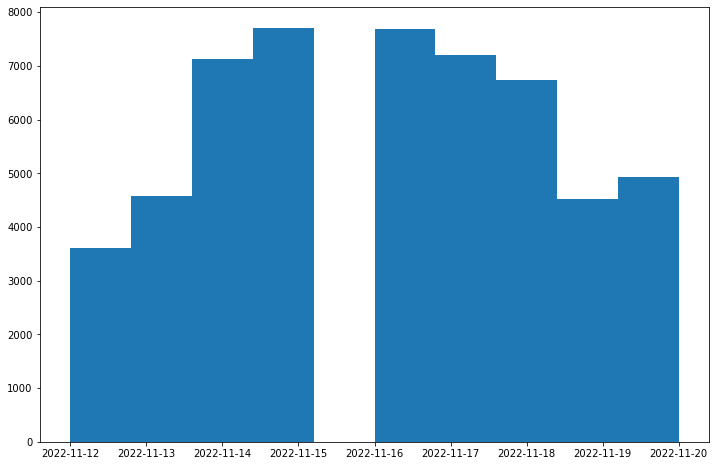

In [ ]:

dates = []
for t in dates_list:
    # extraer la parte de la fecha de la hora de la fecha
    date_str = t.split(' ')[0]
    # extraer la hora de la fecha
    year,month,day = [int(i) for i in date_str.split('-')]
    # crear un objeto de fecha
    d = date(year, month, day)
    # sort
    dates.append(d)

# sort fechas
dates.sort()

# encontrar la primera y la última fecha
min_date = dates[0]
max_date = dates[-1]

# calcular el número de días
length = (max_date - min_date).days + 1

# histograma usando plot
plt.figure(figsize=(12,8))
plt.hist(dates)
plt.show()

# PREPROCESAMIENTO

# Borrado de Caracteres Especiales y StopWords

In [ ]:
# Creacion de Funcion para la limpieza de datos
def limpiezaCaracteres(tweet):
    texto_hash = re.sub(r"(?:\#+[\w_]+[\w\'_\-]*[\w_]+)", '', tweet) #Borra palabra con hashtag
    texto_arroba = re.sub(r'(?:@[\w_]+)', '', texto_hash) #Borra usuario con arroba
    texto_sp = re.sub(r'[^\w\s]', '', texto_arroba) #Borra signos de puntuacion
    text_sinlink = re.sub(r'http\S+', '', texto_sp) #Borrar Links Https
    text_num = re.sub(r'(?:(?:\d+,?)+(?:\.?\d+)?)', '',text_sinlink) #Borra numeros
    word_tokens = word_tokenize(text_num)

    # Borra StopWords(conectores como para,por,de,un,como,etc)
    stop_words = set(stopwords.words('spanish'))

    filtered_sentence = []

    for w in word_tokens:
        if w not in stop_words:
            filtered_sentence.append(w)

    return filtered_sentence

# Ejemplo:
# limpiezaCaracteres('''una #palabra que uso  @piero 955584741 😂 hola Hola papa mama 😁 actualidad 😁 (como "el", "un", "un", "en") 😂😁😁 de un motor de búsqueda como http://saturdays.ai/2022/04/07/hapyness-analisis-de-sentimientos-en-la-poblacion-de-aragon/''')

In [ ]:
#Usamos la funcion "limpiezaCaracteres" para obtener listas de las palabras limpias y usamos el join para convertirla a Object
#Todo se guardara en la nueva columna "tweets_transform"
tweet_esp["tweets_transform"] = tweet_esp["tweet"].apply(limpiezaCaracteres).apply(lambda x:" ".join(x))

C:\Users\piero\AppData\Local\Temp\ipykernel_15996\1204970158.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_esp["tweets_transform"] = tweet_esp["tweet"].apply(limpiezaCaracteres).apply(lambda x:" ".join(x))


In [ ]:
# Imprimimos el DataFrame con la nueva columna "Tweets_Transform"
tweet_esp

date        username language  \
0      2022-11-20 19:59:42       Flipa_net       es   
1      2022-11-20 19:59:23    DRDESTRUCTO7       es   
2      2022-11-20 19:59:23         poesqro       es   
3      2022-11-20 19:59:20        oscaruhp       es   
4      2022-11-20 19:59:07        Mel_EICS       es   
...                    ...             ...      ...   
85059  2022-11-12 08:17:04    TecnoBinaria       es   
85060  2022-11-12 08:16:59         Aubar77       es   
85061  2022-11-12 08:16:19   TeacherGrunon       es   
85062  2022-11-12 08:15:49      PoliciacaL       es   
85063  2022-11-12 08:12:41  2DACIADCR11511       es   

                                                   tweet  nlikes  \
0      "🎱 Tecnología móvil: qué es, desarrollo, usos ...       0   
1      @YanethAguirre Jack el saltarin le llaman un d...       0   
2      En Reforma Agraria, POES recupera vehículo que...       0   
3      Pregunta: ¿Qué tecnología quieres aprender par...       0   
4      No se que es mejor si el efecto o que hace car...       0   
...                                                  ...     ...   
85059  HONOR 70 | Review en Español  https://t.co/W1D...       0   
85060  Hola chicos. ¿Volvemos a las papeletas y el vo...      65   
85061  #tecnología #apple #tech - ¿Tienes textos guar...       0   
85062  Reconoció #COPOCYT a investigadores de la #UAS...       0   
85063  @GNBCmdtGral @NestorLReverol @PresidencialVen ...       0   

                                        tweets_transform  
0      Tecnología móvil desarrollo usos tipos tecnolo...  
1                 Jack saltarin llaman demonio peligroso  
2      En Reforma Agraria POES recupera vehículo sido...  
3      Pregunta Qué tecnología quieres aprender año v...  
4      No mejor si efecto hace cara viejo entiende te...  
...                                                  ...  
85059                               HONOR Review Español  
85060  Hola chicos Volvemos papeletas voto calesita L...  
85061  Tienes textos guardados Notas Adhesivas Así pu...  
85062  Reconoció investigadores Premio Ciencia Tecnol...  
85063  Espacios calidad tecnología mejor formación ca...  

[54099 rows x 6 columns]

In [ ]:
#Guardamos el Dataframe con los tweets sin StopWords y Caracteres Especiales
tweet_esp.to_csv("DataTwitterStopWords.csv", index=False)

## Utilizamos solo la columna con los Tweets Transformados

In [ ]:
#Eliminamos la columna Tweet
tweet_limpio = tweet_esp.drop(['tweet'], axis=1)

In [ ]:
#Imprimimos el nuevo DataFrame
tweet_limpio

date        username language  nlikes  \
0      2022-11-20 19:59:42       Flipa_net       es       0   
1      2022-11-20 19:59:23    DRDESTRUCTO7       es       0   
2      2022-11-20 19:59:23         poesqro       es       0   
3      2022-11-20 19:59:20        oscaruhp       es       0   
4      2022-11-20 19:59:07        Mel_EICS       es       0   
...                    ...             ...      ...     ...   
85059  2022-11-12 08:17:04    TecnoBinaria       es       0   
85060  2022-11-12 08:16:59         Aubar77       es      65   
85061  2022-11-12 08:16:19   TeacherGrunon       es       0   
85062  2022-11-12 08:15:49      PoliciacaL       es       0   
85063  2022-11-12 08:12:41  2DACIADCR11511       es       0   

                                        tweets_transform  
0      Tecnología móvil desarrollo usos tipos tecnolo...  
1                 Jack saltarin llaman demonio peligroso  
2      En Reforma Agraria POES recupera vehículo sido...  
3      Pregunta Qué tecnología quieres aprender año v...  
4      No mejor si efecto hace cara viejo entiende te...  
...                                                  ...  
85059                               HONOR Review Español  
85060  Hola chicos Volvemos papeletas voto calesita L...  
85061  Tienes textos guardados Notas Adhesivas Así pu...  
85062  Reconoció investigadores Premio Ciencia Tecnol...  
85063  Espacios calidad tecnología mejor formación ca...  

[54099 rows x 5 columns]

In [ ]:
#Guardamos Data con TweetsTransformadas
tweet_limpio.to_csv("DataTwitterTransform.csv", index=False)

# Borrar Filas con Caracteres Especiales

In [ ]:
prueba = tweet_limpio.dropna(axis=0) # primero elimina los null
con_guion = prueba[prueba.tweets_transform.str.contains("_")]
con_raya = prueba[prueba.tweets_transform.str.contains("一")]
con_chino = prueba[prueba.tweets_transform.str.contains("세기 소녀")]
con_may = prueba[prueba.tweets_transform.str.contains("ᔕᗴᗰᗩᑎᗩ ᗪᗴ ᒪᗩ ᑕᎥᗴᑎᑕᎥᗩ")]
con_raro = prueba[prueba.tweets_transform.str.contains("ღ")]
total = pd.concat([con_guion,con_raya,con_chino,con_may,con_raro],axis=0) # Uniendo los dataframe
tweet_limpio2 = tweet_limpio.drop(index=total.index)

In [ ]:
tweet_limpio2

date        username language  nlikes  \
0      2022-11-20 19:59:42       Flipa_net       es       0   
1      2022-11-20 19:59:23    DRDESTRUCTO7       es       0   
2      2022-11-20 19:59:23         poesqro       es       0   
3      2022-11-20 19:59:20        oscaruhp       es       0   
4      2022-11-20 19:59:07        Mel_EICS       es       0   
...                    ...             ...      ...     ...   
53995  2022-11-12 08:17:04    TecnoBinaria       es       0   
53996  2022-11-12 08:16:59         Aubar77       es      65   
53997  2022-11-12 08:16:19   TeacherGrunon       es       0   
53998  2022-11-12 08:15:49      PoliciacaL       es       0   
53999  2022-11-12 08:12:41  2DACIADCR11511       es       0   

                                        tweets_transform  
0      Tecnología móvil desarrollo usos tipos tecnolo...  
1                 Jack saltarin llaman demonio peligroso  
2      En Reforma Agraria POES recupera vehículo sido...  
3      Pregunta Qué tecnología quieres aprender año v...  
4      No mejor si efecto hace cara viejo entiende te...  
...                                                  ...  
53995                               HONOR Review Español  
53996  Hola chicos Volvemos papeletas voto calesita L...  
53997  Tienes textos guardados Notas Adhesivas Así pu...  
53998  Reconoció investigadores Premio Ciencia Tecnol...  
53999  Espacios calidad tecnología mejor formación ca...  

[54000 rows x 5 columns]

In [ ]:
#Guardamos Data con TweetsTransformadas
tweet_limpio2.to_csv("DataTwitterSinEspecial.csv", index=False)

# Lematizacion

In [ ]:
#Dividimos el Dataframe en 5 partes
lista = []
for i in range(0,54001,10800):
    lista.append(tweet_limpio2.loc[i:i+10799,:])

In [ ]:
data1 = pd.DataFrame(lista[0])
data2 = pd.DataFrame(lista[1])
data3 = pd.DataFrame(lista[2])
data4 = pd.DataFrame(lista[3])
data5 = pd.DataFrame(lista[4])

In [ ]:
#Guardamos las 5 divisiones para poder Lematizarlo por
data1.to_csv("data1.csv", index=False)
data2.to_csv("data2.csv", index=False)
data3.to_csv("data3.csv", index=False)
data4.to_csv("data4.csv", index=False)
data5.to_csv("data5.csv", index=False)


In [ ]:
#Imprimimos los primeros 10800 datos
data1

date         username language  nlikes  \
0      2022-11-20 19:59:42        Flipa_net       es       0   
1      2022-11-20 19:59:23     DRDESTRUCTO7       es       0   
2      2022-11-20 19:59:23          poesqro       es       0   
3      2022-11-20 19:59:20         oscaruhp       es       0   
4      2022-11-20 19:59:07         Mel_EICS       es       0   
...                    ...              ...      ...     ...   
10795  2022-11-18 17:01:12     Porcicultura       es       0   
10796  2022-11-18 17:01:02       Mrianela77       es       1   
10797  2022-11-18 17:01:02  MaraElenaFernn6       es       3   
10798  2022-11-18 17:01:00   hernandez_dala       es       0   
10799  2022-11-18 17:00:57           ITV_SV       es       0   

                                        tweets_transform  
0      Tecnología móvil desarrollo usos tipos tecnolo...  
1                 Jack saltarin llaman demonio peligroso  
2      En Reforma Agraria POES recupera vehículo sido...  
3      Pregunta Qué tecnología quieres aprender año v...  
4      No mejor si efecto hace cara viejo entiende te...  
...                                                  ...  
10795  EVENTOS El Banff Seminario cerdo reunión trans...  
10796  Yo pierdo tecnología Gorrion imagino publicida...  
10797        Genial Er Con tecnología seguro encontramos  
10798      Iván Hernández Puede metaverso ser sostenible  
10799  Elon Musk pone ultimátum empleados Twitter irs...  

[10800 rows x 5 columns]

In [ ]:
#Creamos funcion para que convierta los tweets a Lemas()
def lematizacion(tweet):
    nlp = spacy.load('es_core_news_sm')
    doc = nlp(tweet)
    lemmas = [tok.lemma_.lower() for tok in doc]
    objeto = " ".join(lemmas)
    return objeto

# Lematizacion = Transformar de (pide -> pedir) o (Soy -> ser)
# # Ejemplo
#lematizacion('Soy un texto que pide a gritos que lo procesen. jajajjajaj')

'ser uno texto que pedir a grito que él procesar . jajajjajaj'

In [ ]:
#Primeros 10 Tweets sin lematizar
# tweet_limpio["tweets_transform"][:10]

0    Tecnología móvil desarrollo usos tipos tecnolo...
1               Jack saltarin llaman demonio peligroso
2    En Reforma Agraria POES recupera vehículo sido...
3    Pregunta Qué tecnología quieres aprender año v...
4    No mejor si efecto hace cara viejo entiende te...
5    La BBC ignora ceremonia apertura Mundial favor...
6                    Notaría tecnología pueden ir mano
7    Yanjun Xu provincia Jiangsu capturado conspira...
8    Fue offside misma tecnología utiliza liga prem...
9    Por anularon acción termina gol Estuvo bien ma...
Name: tweets_transform, dtype: object

In [ ]:
##Primeros 10 Tweets lematizados
# tweet_limpio["tweets_transform"][:10].apply(lematizacion)

0    tecnología móvil desarrollo uso tipo tecnologí...
1               jack saltarin llamar demonio peligroso
2    en reforma agraria poes recuperar vehículo ser...
3    preguntar qué tecnología querer aprender año v...
4    no mejor si efecto hacer cara viejo entender t...
5    el bbc ignorar ceremonio apertura mundial favo...
6                     notarío tecnología poder ir mano
7    yanjun xu provincia jiangsu capturado conspira...
8    ser offsidir mismo tecnología utilizar liga pr...
9    por anular acción termín gol estar bien mal an...
Name: tweets_transform, dtype: object

### Primera Division de Datos Lematizada

In [ ]:
data1["tweets_transform"] = data1["tweets_transform"].astype(str).apply(lematizacion)

In [ ]:
data1

date         username language  nlikes  \
0      2022-11-20 19:59:42        Flipa_net       es       0   
1      2022-11-20 19:59:23     DRDESTRUCTO7       es       0   
2      2022-11-20 19:59:23          poesqro       es       0   
3      2022-11-20 19:59:20         oscaruhp       es       0   
4      2022-11-20 19:59:07         Mel_EICS       es       0   
...                    ...              ...      ...     ...   
10795  2022-11-18 17:01:12     Porcicultura       es       0   
10796  2022-11-18 17:01:02       Mrianela77       es       1   
10797  2022-11-18 17:01:02  MaraElenaFernn6       es       3   
10798  2022-11-18 17:01:00   hernandez_dala       es       0   
10799  2022-11-18 17:00:57           ITV_SV       es       0   

                                        tweets_transform  
0      tecnología móvil desarrollo uso tipo tecnologí...  
1                 jack saltarin llamar demonio peligroso  
2      en reforma agraria poes recuperar vehículo ser...  
3      preguntar qué tecnología querer aprender año v...  
4      no mejor si efecto hacer cara viejo entender t...  
...                                                  ...  
10795  evento el banff seminario cerdo reunión transf...  
10796  yo pierdo tecnología gorrion imagino publicida...  
10797          genial er con tecnología seguro encontrar  
10798      iván hernández poder metaverso ser sostenible  
10799  elon musk poner ultimátum empleado twitter ir ...  

[10800 rows x 5 columns]

In [ ]:
data1.to_csv("data1process.csv", index=False)

### Segunda Division de Datos Lematizada

In [ ]:
data2["tweets_transform"] = data2["tweets_transform"].astype(str).apply(lematizacion)

In [ ]:
data2.to_csv("data2process.csv", index=False)

In [ ]:
data2

date         username language  nlikes  \
10800  2022-11-18 17:00:51        dinoPicsu       es       1   
10801  2022-11-18 17:00:31        Indigo_IT       es       1   
10802  2022-11-18 17:00:18          gmicele       es       1   
10803  2022-11-18 17:00:18       DameGangas       es       0   
10804  2022-11-18 17:00:14       RevistaNeo       es       0   
...                    ...              ...      ...     ...   
21595  2022-11-17 08:04:58  Mauriciiserrano       es       0   
21596  2022-11-17 08:04:31         edezacas       es       6   
21597  2022-11-17 08:04:26   JusticeVonKais       es       1   
21598  2022-11-17 08:04:17      icare_chile       es       2   
21599  2022-11-17 08:04:15         PSPlusES       es      36   

                                        tweets_transform  
10800  el mano médico enfermera ciència tecnologia de...  
10801  empresa tecnología buscar desarrollador full s...  
10802  con tecnologia blockchain ir necesitar mas esc...  
10803  vaya ofertón muy buen precio pantalla x gb ram...  
10804  si planear lanzar artículo contar saber link n...  
...                                                  ...  
21595        ya poder comprar iphone tecnología g y plus  
21596  alguno posibilidad nft prueba entregar contrat...  
21597  mf verdad distorsionar foco juegos randys gust...  
21598  smatosen oracle creer tecnología poder aprende...  
21599  siéntelo como nunca antes escuchar cada rugido...  

[10800 rows x 5 columns]

### Tercera Division de Datos Lematizada

In [ ]:
data3["tweets_transform"] = data3["tweets_transform"].astype(str).apply(lematizacion)

In [ ]:
data3.to_csv("data3process.csv", index=False)

In [ ]:
data3

date         username language  nlikes  \
21600  2022-11-17 08:04:13           ITLARD       es       8   
21601  2022-11-17 08:04:10   EleusisCordova       es       7   
21602  2022-11-17 08:03:44         erinconm       es       2   
21603  2022-11-17 08:03:42  ESPERAN46079282       es       1   
21604  2022-11-17 08:03:39   quijoteandoles       es       0   
...                    ...              ...      ...     ...   
32395  2022-11-15 18:10:00  revista2000agro       es       0   
32396  2022-11-15 18:09:45           japa49       es       0   
32397  2022-11-15 18:09:41   armandoluisgay       es       0   
32398  2022-11-15 18:09:34  berlingonzalezs       es       1   
32399  2022-11-15 18:09:25  batallakultural       es       7   

                                        tweets_transform  
21600  hoy hacer historiar uno gran día institución t...  
21601  méxico ganar terreno exportación alto tecnolog...  
21602           durante reunión comité tecnología hablar  
21603  acaso tecnologir evolucionado poder tener mata...  
21604  todo vivir humanidad hoy día tecnología econom...  
...                                                  ...  
32395  bkt presentar nuevo obra maestro tecnología di...  
32396  con razón bad bunny becerro cantar puro tecnol...  
32397  quién planificar destinado fracaso por tecnolo...  
32398    el mejor carta pokémon tcg sacar silver tempest  
32399  ver atento lector día tecnología satelital coh...  

[10800 rows x 5 columns]

### Cuarta Division de Datos Lematizada

In [ ]:
data4["tweets_transform"] = data4["tweets_transform"].astype(str).apply(lematizacion)

In [ ]:
data4.to_csv("data4process.csv", index=False)

In [ ]:
data4

date         username language  nlikes  \
32400  2022-11-15 18:09:20      joaopixeles       es       0   
32401  2022-11-15 18:09:13        DrCCaroli       es       3   
32402  2022-11-15 18:09:08     sntejovennac       es       6   
32403  2022-11-15 18:09:02         Hoyentec       es       0   
32404  2022-11-15 18:08:49  JuanBautistaETH       es       0   
...                    ...              ...      ...     ...   
43195  2022-11-14 10:30:07  URACCAN_oficial       es       0   
43196  2022-11-14 10:30:02          WDLatAm       es       2   
43197  2022-11-14 10:30:00         IFC_UNAM       es       4   
43198  2022-11-14 10:30:00         deia_eus       es       0   
43199  2022-11-14 10:30:00       ElAragueno       es       0   

                                        tweets_transform  
32400  aunque sinónir hablar término puramente lingüí...  
32401  el evaluación d riesgo propio d cada zona geog...  
32402  el tecnología grande beneficio nunca demá darn...  
32403  él revelar posible aspecto pixel plegable goog...  
32404  el día red social totalmente descentralizado t...  
...                                                  ...  
43195  𝐑𝐄𝐒𝐔𝐋𝐓𝐀𝐃𝐎𝐒 uno total nueve defensa monográfico...  
43196  sn nvme ssd almacenamiento alto desempeño tecn...  
43197  este noviembre seminario institucional cómo te...  
43198  oyes entiend humanidad tecnologío adaptación a...  
43199  india construir bajo río túnel ferroviario car...  

[10800 rows x 5 columns]

### Quinta Division de Datos Lematizada

In [ ]:
data5["tweets_transform"] = data5["tweets_transform"].astype(str).apply(lematizacion)

In [ ]:
data5

date        username language  nlikes  \
43200  2022-11-14 10:30:00       SoyUnison       es       7   
43201  2022-11-14 10:29:59     SIIP_UNCUYO       es       1   
43202  2022-11-14 10:29:59   revolutegplus       es       0   
43203  2022-11-14 10:29:44      pepetesoro       es       0   
43204  2022-11-14 10:29:44      pepetesoro       es       0   
...                    ...             ...      ...     ...   
53995  2022-11-12 08:17:04    TecnoBinaria       es       0   
53996  2022-11-12 08:16:59         Aubar77       es      65   
53997  2022-11-12 08:16:19   TeacherGrunon       es       0   
53998  2022-11-12 08:15:49      PoliciacaL       es       0   
53999  2022-11-12 08:12:41  2DACIADCR11511       es       0   

                                        tweets_transform  
43200  del noviembre llevar cabo semana ingeniería te...  
43201  destacado investigador disertacer nuevo tecnol...  
43202  el informar starlink propiedad spacex comprado...  
43203  vamos venir ser mensaje neoludito postunamober...  
43204  porque coser artículo subrayar parecer crucial...  
...                                                  ...  
53995                               honor review español  
53996  hola chico volvemos papeleta voto calesitar el...  
53997  tener texto guardado notas adhesivas así poder...  
53998  reconoció investigador premio ciencia tecnolog...  
53999  espacios calidad tecnologeír mejor formación c...  

[10800 rows x 5 columns]

In [ ]:
data5.to_csv("data5process.csv", index=False)

## Uniendo la division de datos en un DataFrame

In [ ]:
d12 = pd.concat([data1,data2]) #Uniendo Data1 y Data 2
d123 = pd.concat([d12,data3]) #Uniendo Data12 y Data 3
d1234 = pd.concat([d123,data4]) #Uniendo Data123 y Data 4
tweet_procesado = pd.concat([d1234,data5]) #Uniendo Data1234 y Data 5

In [ ]:
tweet_procesado

date        username language  nlikes  \
0      2022-11-20 19:59:42       Flipa_net       es       0   
1      2022-11-20 19:59:23    DRDESTRUCTO7       es       0   
2      2022-11-20 19:59:23         poesqro       es       0   
3      2022-11-20 19:59:20        oscaruhp       es       0   
4      2022-11-20 19:59:07        Mel_EICS       es       0   
...                    ...             ...      ...     ...   
53995  2022-11-12 08:17:04    TecnoBinaria       es       0   
53996  2022-11-12 08:16:59         Aubar77       es      65   
53997  2022-11-12 08:16:19   TeacherGrunon       es       0   
53998  2022-11-12 08:15:49      PoliciacaL       es       0   
53999  2022-11-12 08:12:41  2DACIADCR11511       es       0   

                                        tweets_transform  
0      tecnología móvil desarrollo uso tipo tecnologí...  
1                 jack saltarin llamar demonio peligroso  
2      en reforma agraria poes recuperar vehículo ser...  
3      preguntar qué tecnología querer aprender año v...  
4      no mejor si efecto hacer cara viejo entender t...  
...                                                  ...  
53995                               honor review español  
53996  hola chico volvemos papeleta voto calesitar el...  
53997  tener texto guardado notas adhesivas así poder...  
53998  reconoció investigador premio ciencia tecnolog...  
53999  espacios calidad tecnologeír mejor formación c...  

[54000 rows x 5 columns]

In [ ]:
#Guardando la Data Procesada
tweet_procesado.to_csv("DataLematizada.csv", index=False)

# Análisis de Sentimientos

In [ ]:
clasificacion = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [ ]:
#Funcion para el Analisis de Sentimientos
def analisis(data):
    results = clasificacion(data)
    return results

#Ejemplos
# analisis("ser triste")

In [ ]:
results = tweet_procesado["tweets_transform"].apply(analisis)
results

0        [{'label': 'NEGATIVE', 'score': 0.979468047618...
1        [{'label': 'NEGATIVE', 'score': 0.537140965461...
2        [{'label': 'NEGATIVE', 'score': 0.984842181205...
3        [{'label': 'NEGATIVE', 'score': 0.742462456226...
4        [{'label': 'NEGATIVE', 'score': 0.989268481731...
                               ...                        
53995    [{'label': 'POSITIVE', 'score': 0.997338116168...
53996    [{'label': 'NEGATIVE', 'score': 0.983866572380...
53997    [{'label': 'NEGATIVE', 'score': 0.992929279804...
53998    [{'label': 'POSITIVE', 'score': 0.962810397148...
53999    [{'label': 'POSITIVE', 'score': 0.560329139232...
Name: tweets_transform, Length: 54000, dtype: object

In [ ]:
sentimientos = results.copy()

In [ ]:
ind = 0
positivo = []
comentario = []
scores = []

for result in sentimientos:
    #print(result[0]['label'])
    comentario.append(result[0]['label'])
    positivo.append(tweet_procesado['tweets_transform'][ind])
    #print({result['label']},{round(result['score'],4)})

    scores.append(round(result[0]['score'],4))
    ind=ind + 1

In [ ]:
dataSentimientos = pd.DataFrame({"Comentario":comentario,"Score":scores,"Tweet":positivo})

In [ ]:
dataSentimientos

Comentario   Score                                              Tweet
0       NEGATIVE  0.9795  tecnología móvil desarrollo uso tipo tecnologí...
1       NEGATIVE  0.5371             jack saltarin llamar demonio peligroso
2       NEGATIVE  0.9848  en reforma agraria poes recuperar vehículo ser...
3       NEGATIVE  0.7425  preguntar qué tecnología querer aprender año v...
4       NEGATIVE  0.9893  no mejor si efecto hacer cara viejo entender t...
...          ...     ...                                                ...
53995   POSITIVE  0.9973                               honor review español
53996   NEGATIVE  0.9839  hola chico volvemos papeleta voto calesitar el...
53997   NEGATIVE  0.9929  tener texto guardado notas adhesivas así poder...
53998   POSITIVE  0.9628  reconoció investigador premio ciencia tecnolog...
53999   POSITIVE  0.5603  espacios calidad tecnologeír mejor formación c...

[54000 rows x 3 columns]

In [ ]:
dataSentimientos.to_csv("DataTwitterSentimientos.csv", index=False)

In [ ]:
def tokenization(text):
    text = word_tokenize(text.lower())
    return text

In [ ]:
nube = dataSentimientos.copy()
nube["Lista"] = nube['Tweet'].apply(tokenization)

In [ ]:
nube

Comentario   Score                                              Tweet  \
0       NEGATIVE  0.9795  tecnología móvil desarrollo uso tipo tecnologí...   
1       NEGATIVE  0.5371             jack saltarin llamar demonio peligroso   
2       NEGATIVE  0.9848  en reforma agraria poes recuperar vehículo ser...   
3       NEGATIVE  0.7425  preguntar qué tecnología querer aprender año v...   
4       NEGATIVE  0.9893  no mejor si efecto hacer cara viejo entender t...   
...          ...     ...                                                ...   
53995   POSITIVE  0.9973                               honor review español   
53996   NEGATIVE  0.9839  hola chico volvemos papeleta voto calesitar el...   
53997   NEGATIVE  0.9929  tener texto guardado notas adhesivas así poder...   
53998   POSITIVE  0.9628  reconoció investigador premio ciencia tecnolog...   
53999   POSITIVE  0.5603  espacios calidad tecnologeír mejor formación c...   

                                                   Lista  
0      [tecnología, móvil, desarrollo, uso, tipo, tec...  
1           [jack, saltarin, llamar, demonio, peligroso]  
2      [en, reforma, agraria, poes, recuperar, vehícu...  
3      [preguntar, qué, tecnología, querer, aprender,...  
4      [no, mejor, si, efecto, hacer, cara, viejo, en...  
...                                                  ...  
53995                           [honor, review, español]  
53996  [hola, chico, volvemos, papeleta, voto, calesi...  
53997  [tener, texto, guardado, notas, adhesivas, así...  
53998  [reconoció, investigador, premio, ciencia, tec...  
53999  [espacios, calidad, tecnologeír, mejor, formac...  

[54000 rows x 4 columns]

In [ ]:
nube.to_csv("DataTwitterNube.csv", index=False)

In [ ]:
nubePalabras = nube.explode("Lista")
nubePalabras

Comentario   Score                                              Tweet  \
0       NEGATIVE  0.9795  tecnología móvil desarrollo uso tipo tecnologí...   
0       NEGATIVE  0.9795  tecnología móvil desarrollo uso tipo tecnologí...   
0       NEGATIVE  0.9795  tecnología móvil desarrollo uso tipo tecnologí...   
0       NEGATIVE  0.9795  tecnología móvil desarrollo uso tipo tecnologí...   
0       NEGATIVE  0.9795  tecnología móvil desarrollo uso tipo tecnologí...   
...          ...     ...                                                ...   
53999   POSITIVE  0.5603  espacios calidad tecnologeír mejor formación c...   
53999   POSITIVE  0.5603  espacios calidad tecnologeír mejor formación c...   
53999   POSITIVE  0.5603  espacios calidad tecnologeír mejor formación c...   
53999   POSITIVE  0.5603  espacios calidad tecnologeír mejor formación c...   
53999   POSITIVE  0.5603  espacios calidad tecnologeír mejor formación c...   

             Lista  
0       tecnología  
0            móvil  
0       desarrollo  
0              uso  
0             tipo  
...            ...  
53999      calidad  
53999  tecnologeír  
53999        mejor  
53999    formación  
53999        cadet  

[761169 rows x 4 columns]

In [ ]:
nubePalabras.to_csv("DataTwitterNubeExplode.csv", index=False)

In [ ]:
words = list(itertools.chain(nubePalabras['Lista']))
wf = collections.Counter(words)
wf.most_common(20)

[('tecnología', 32890),
 ('el', 14942),
 ('él', 6577),
 ('tecnologío', 6033),
 ('poder', 5562),
 ('ser', 5377),
 ('hacer', 4893),
 ('si', 4371),
 ('nuevo', 3630),
 ('ciencia', 3000),
 ('no', 2949),
 ('mejor', 2714),
 ('ir', 2698),
 ('en', 2669),
 ('año', 2646),
 ('ver', 2561),
 ('y', 2111),
 ('cómo', 2075),
 ('mundo', 2066),
 ('hoy', 2050)]

In [ ]:
words = ' '.join(nube['Tweet'])

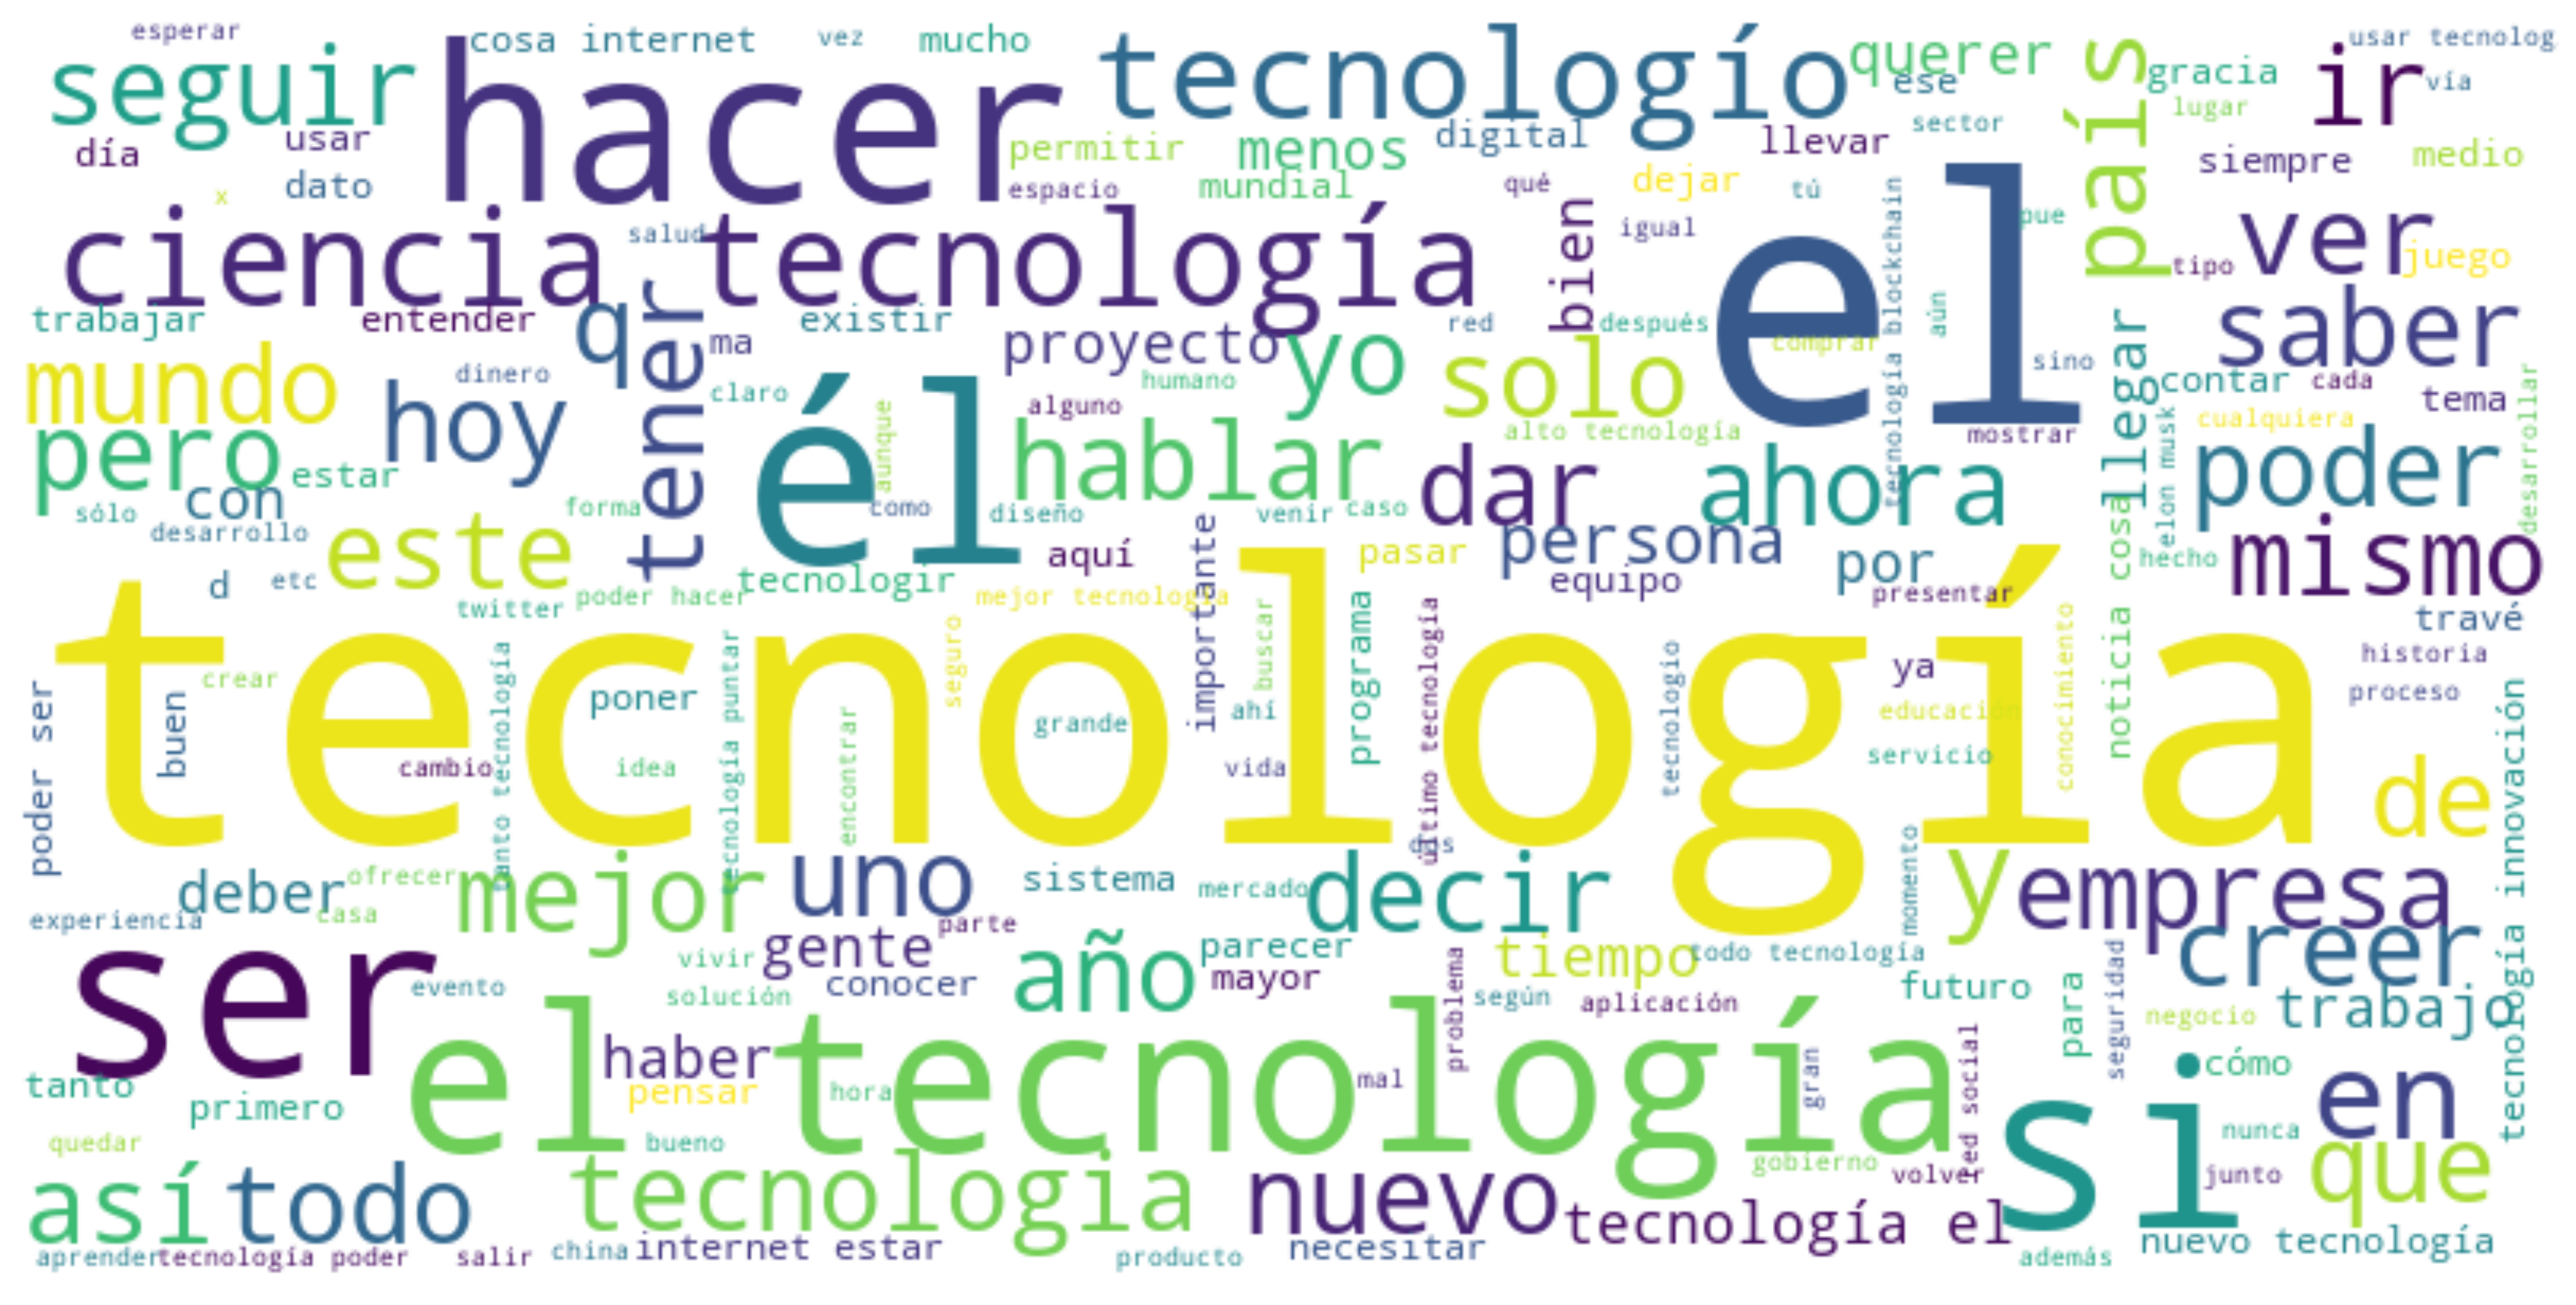

In [ ]:
wordcloud = WordCloud(background_color="white",
                      # stopwords = stopwords,
                    #   colormap = "icefire",
                      scale = 2).generate(words)
# Display the generated image:
plt.figure(figsize = (15, 15), dpi = 300, facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad = 0)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

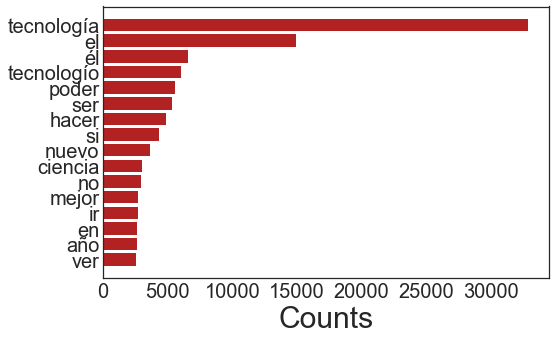

In [ ]:
a = nubePalabras['Lista'].value_counts().sort_values(ascending = True).tail(16)
x = a.index
plt.figure(figsize = (8,5))
plt.style.use('seaborn-white')
plt.barh(x,a, color = "firebrick")
plt.xlabel("Counts", fontsize = 30)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

In [ ]:
dataSentimientos["Comentario"].value_counts()

NEGATIVE    46749
POSITIVE     7251
Name: Comentario, dtype: int64

In [ ]:
dataSentimientos["target"]=dataSentimientos["Comentario"].map({'NEGATIVE': 0, 'POSITIVE':1})

In [ ]:
dataSentimientos

Comentario   Score                                              Tweet  \
0       NEGATIVE  0.9795  tecnología móvil desarrollo uso tipo tecnologí...   
1       NEGATIVE  0.5371             jack saltarin llamar demonio peligroso   
2       NEGATIVE  0.9848  en reforma agraria poes recuperar vehículo ser...   
3       NEGATIVE  0.7425  preguntar qué tecnología querer aprender año v...   
4       NEGATIVE  0.9893  no mejor si efecto hacer cara viejo entender t...   
...          ...     ...                                                ...   
53995   POSITIVE  0.9973                               honor review español   
53996   NEGATIVE  0.9839  hola chico volvemos papeleta voto calesitar el...   
53997   NEGATIVE  0.9929  tener texto guardado notas adhesivas así poder...   
53998   POSITIVE  0.9628  reconoció investigador premio ciencia tecnolog...   
53999   POSITIVE  0.5603  espacios calidad tecnologeír mejor formación c...   

       target  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
53995       1  
53996       0  
53997       0  
53998       1  
53999       1  

[54000 rows x 4 columns]

In [ ]:
dataSentimientos.to_csv("DataTwitterSentimientoTarget.csv", index=False)

In [ ]:
dataSentimientos["target"].value_counts()

0    46749
1     7251
Name: target, dtype: int64

(array([46749.,     0.,     0.,  7251.]),
 array([0.  , 0.25, 0.5 , 0.75, 1.  ]),
 <BarContainer object of 4 artists>)

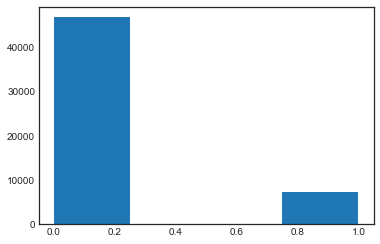

In [ ]:
plt.hist(dataSentimientos['target'],bins=4)

# Modelos de Machine Learning

## Division de Datos

In [ ]:
from collections import defaultdict

import pickle
from sklearn import preprocessing
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from xgboost import XGBClassifier

In [ ]:
datos = dataSentimientos.sample(n=10000)
datos.reset_index(inplace=True, drop=True)
datos

Comentario   Score                                              Tweet  \
0      NEGATIVE  0.9795  tecnología móvil desarrollo uso tipo tecnologí...   
1      NEGATIVE  0.5371             jack saltarin llamar demonio peligroso   
2      NEGATIVE  0.9848  en reforma agraria poes recuperar vehículo ser...   
3      NEGATIVE  0.7425  preguntar qué tecnología querer aprender año v...   
4      NEGATIVE  0.9893  no mejor si efecto hacer cara viejo entender t...   
...         ...     ...                                                ...   
9995   NEGATIVE  0.9897  𝐕iva sueño entonces 𝐔𝐚𝐲 𝘩𝘦𝘤𝘩𝘪𝘤𝘦𝘳𝘰 𝐄l hombre da...   
9996   NEGATIVE  0.6227  pabellón etms traer nuevo expo manufactura feb...   
9997   NEGATIVE  0.8518  totalmente cierto mariela ese paradoja supuest...   
9998   NEGATIVE  0.9836  vipa mejor opción si ver alguno incidente acci...   
9999   NEGATIVE  0.9710  si de hecho solo seguro confiable incluir tecn...   

      target  
0          0  
1          0  
2          0  
3          0  
4          0  
...      ...  
9995       0  
9996       0  
9997       0  
9998       0  
9999       0  

[10000 rows x 4 columns]

In [ ]:
X = datos['Tweet']
X


0       tecnología móvil desarrollo uso tipo tecnologí...
1                  jack saltarin llamar demonio peligroso
2       en reforma agraria poes recuperar vehículo ser...
3       preguntar qué tecnología querer aprender año v...
4       no mejor si efecto hacer cara viejo entender t...
                              ...                        
9995    𝐕iva sueño entonces 𝐔𝐚𝐲 𝘩𝘦𝘤𝘩𝘪𝘤𝘦𝘳𝘰 𝐄l hombre da...
9996    pabellón etms traer nuevo expo manufactura feb...
9997    totalmente cierto mariela ese paradoja supuest...
9998    vipa mejor opción si ver alguno incidente acci...
9999    si de hecho solo seguro confiable incluir tecn...
Name: Tweet, Length: 10000, dtype: object

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

tfidfvectorizer = TfidfVectorizer()
tfidf_wm = tfidfvectorizer.fit_transform(X)
tfidf_tokens = tfidfvectorizer.get_feature_names_out()

ml = pd.DataFrame(data = tfidf_wm.toarray(),columns = tfidf_tokens)
contarVec = pd.concat((datos[["Comentario", 'Score',"target"]], ml), axis = 1)
contarVec

Comentario   Score  target   aa  aaa  aaaaa  aaaaah  aaaala  aaah  aac  \
0      NEGATIVE  0.9795       0  0.0  0.0    0.0     0.0     0.0   0.0  0.0   
1      NEGATIVE  0.5371       0  0.0  0.0    0.0     0.0     0.0   0.0  0.0   
2      NEGATIVE  0.9848       0  0.0  0.0    0.0     0.0     0.0   0.0  0.0   
3      NEGATIVE  0.7425       0  0.0  0.0    0.0     0.0     0.0   0.0  0.0   
4      NEGATIVE  0.9893       0  0.0  0.0    0.0     0.0     0.0   0.0  0.0   
...         ...     ...     ...  ...  ...    ...     ...     ...   ...  ...   
9995   NEGATIVE  0.9897       0  0.0  0.0    0.0     0.0     0.0   0.0  0.0   
9996   NEGATIVE  0.6227       0  0.0  0.0    0.0     0.0     0.0   0.0  0.0   
9997   NEGATIVE  0.8518       0  0.0  0.0    0.0     0.0     0.0   0.0  0.0   
9998   NEGATIVE  0.9836       0  0.0  0.0    0.0     0.0     0.0   0.0  0.0   
9999   NEGATIVE  0.9710       0  0.0  0.0    0.0     0.0     0.0   0.0  0.0   

      ...  𝗪𝗪𝗪𝗣𝗥𝗘𝗖𝗜𝗦𝗜𝗢𝗡𝗜𝗧𝗖𝗢𝗠𝗔𝗥  𝗬𝗘𝗔𝗥   𝗲𝗻  𝗲𝘅𝗽𝗲𝗿𝗶𝗲𝗻𝗰𝗶𝗮𝗹  𝗺𝗲𝗱𝗶𝗰𝗶𝗻𝗮  \
0     ...                  0.0   0.0  0.0           0.0       0.0   
1     ...                  0.0   0.0  0.0           0.0       0.0   
2     ...                  0.0   0.0  0.0           0.0       0.0   
3     ...                  0.0   0.0  0.0           0.0       0.0   
4     ...                  0.0   0.0  0.0           0.0       0.0   
...   ...                  ...   ...  ...           ...       ...   
9995  ...                  0.0   0.0  0.0           0.0       0.0   
9996  ...                  0.0   0.0  0.0           0.0       0.0   
9997  ...                  0.0   0.0  0.0           0.0       0.0   
9998  ...                  0.0   0.0  0.0           0.0       0.0   
9999  ...                  0.0   0.0  0.0           0.0       0.0   

      𝗿𝗲𝘀𝗽𝗶𝗿𝗮𝘁𝗼𝗿𝗶𝗮  𝘊𝘪𝘷𝘪𝘭  𝘞𝘢𝘳  𝘩𝘦𝘤𝘩𝘪𝘤𝘦𝘳𝘰  𝘬𝘯𝘰𝘸𝘩𝘰𝘸  
0              0.0    0.0  0.0   0.000000      0.0  
1              0.0    0.0  0.0   0.000000      0.0  
2              0.0    0.0  0.0   0.000000      0.0  
3              0.0    0.0  0.0   0.000000      0.0  
4              0.0    0.0  0.0   0.000000      0.0  
...            ...    ...  ...        ...      ...  
9995           0.0    0.0  0.0   0.280459      0.0  
9996           0.0    0.0  0.0   0.000000      0.0  
9997           0.0    0.0  0.0   0.000000      0.0  
9998           0.0    0.0  0.0   0.000000      0.0  
9999           0.0    0.0  0.0   0.000000      0.0  

[10000 rows x 20445 columns]

In [ ]:
contarVec.to_csv("DataTwitterCountVectorizer.csv", index=False)

In [ ]:
contarVec2 = contarVec.copy()
datos_X = contarVec2.drop(["Comentario","Score","target"], axis = 1)
datos_y = contarVec2["target"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(datos_X,datos_y,test_size = 0.2,random_state = 123)

In [ ]:
print("Total de datos en X Entrenamiento: ",X_train.shape[0])
print("Total de datos en X Test: ",X_test.shape[0])
print("Total de datos en Y Entrenamiento: ",y_train.shape[0])
print("Total de datos en Y Test: ",y_test.shape[0])

Total de datos en X Entrenamiento:  8000
Total de datos en X Test:  2000
Total de datos en Y Entrenamiento:  8000
Total de datos en Y Test:  2000


## Naive Bayes

### Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
modelGNB = GaussianNB()
modelGNB.fit(X_train, y_train)
modelGNB

GaussianNB()

In [ ]:
prediction_gnb = modelGNB.predict(X_test)
conf_gnb       = confusion_matrix(y_test, prediction_gnb)
acc_gnb        = accuracy_score(y_test, prediction_gnb)
prec_gnb       = precision_score(y_test, prediction_gnb, average="weighted")
rec_gnb        = recall_score(y_test, prediction_gnb, average="weighted")
f1_gnb         = f1_score(y_test, prediction_gnb, average="weighted")

print("Confusion Matrix: \n", conf_gnb, '\n')
print("Accuracy    : ", acc_gnb)
print("Recall      : ", prec_gnb)
print("Precision   : ", rec_gnb)
print("F1 Score    : ", f1_gnb)

Confusion Matrix: 
 [[1612  157]
 [ 137   94]] 

Accuracy    :  0.853
Recall      :  0.8584716753341124
Precision   :  0.853
F1 Score    :  0.8556319414793864


In [ ]:
print(classification_report(y_test,prediction_gnb))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92      1769
           1       0.37      0.41      0.39       231

    accuracy                           0.85      2000
   macro avg       0.65      0.66      0.65      2000
weighted avg       0.86      0.85      0.86      2000



### Multinomial Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
modelMNB = MultinomialNB()
modelMNB.fit(X_train, y_train)
modelMNB

MultinomialNB()

In [ ]:
prediction_MNB = modelMNB.predict(X_test)
conf_mnb      = confusion_matrix(y_test, prediction_MNB)
acc_mnb       = accuracy_score(y_test, prediction_MNB)
prec_mnb       = precision_score(y_test, prediction_MNB, average="weighted")
rec_mnb        = recall_score(y_test, prediction_MNB, average="weighted")
f1_mnb        = f1_score(y_test, prediction_MNB, average="weighted")

print("Confusion Matrix: \n", conf_mnb, '\n')
print("Accuracy    : ", acc_mnb)
print("Recall      : ", prec_mnb)
print("Precision   : ", rec_mnb)
print("F1 Score    : ", f1_mnb)

Confusion Matrix: 
 [[1768    1]
 [ 219   12]] 

Accuracy    :  0.89
Recall      :  0.8936289729394913
Precision   :  0.89
F1 Score    :  0.844052881509803


In [ ]:
print(classification_report(y_test,prediction_MNB))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      1769
           1       0.92      0.05      0.10       231

    accuracy                           0.89      2000
   macro avg       0.91      0.53      0.52      2000
weighted avg       0.89      0.89      0.84      2000



## Random Forest Clasifier

In [ ]:
modelRF = RandomForestClassifier(random_state = 123) #valores por defecto
modelRF = modelRF.fit(X_train, y_train)
modelRF

RandomForestClassifier(random_state=123)

In [ ]:
#EVALUATION
prediction_rf = modelRF.predict(X_test)
conf_rf       = confusion_matrix(y_test, prediction_rf)
acc_rf        = accuracy_score(y_test, prediction_rf)
prec_rf       = precision_score(y_test, prediction_rf, average="weighted")
rec_rf        = recall_score(y_test, prediction_rf, average="weighted")
f1_rf         = f1_score(y_test, prediction_rf, average="weighted")

print("Confusion Matrix: \n", conf_rf, '\n')
print("Accuracy    : ", acc_rf)
print("Recall      : ", prec_rf)
print("Precision   : ", rec_rf)
print("F1 Score    : ", f1_rf)

Confusion Matrix: 
 [[1758   11]
 [ 172   59]] 

Accuracy    :  0.9085
Recall      :  0.9030240932642487
Precision   :  0.9085
F1 Score    :  0.8860203511948547


In [ ]:
print(classification_report(y_test,prediction_rf))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      1769
           1       0.84      0.26      0.39       231

    accuracy                           0.91      2000
   macro avg       0.88      0.62      0.67      2000
weighted avg       0.90      0.91      0.89      2000



## SVM

In [ ]:
modelSVM = svm.SVC(random_state = 1) #valores por defecto
modelSVM = modelSVM.fit(X_train, y_train)
modelSVM

SVC(random_state=1)

In [ ]:
prediction_svm = modelSVM.predict(X_test)
conf_svm       = confusion_matrix(y_test, prediction_svm)
acc_svm        = accuracy_score(y_test, prediction_svm)
prec_svm       = precision_score(y_test, prediction_svm, average="weighted")
rec_svm        = recall_score(y_test, prediction_svm, average="weighted")
f1_svm         = f1_score(y_test, prediction_svm, average="weighted")

print("Confusion Matrix: \n", conf_svm, '\n')
print("Accuracy    : ", acc_svm)
print("Recall      : ", prec_svm)
print("Precision   : ", rec_svm)
print("F1 Score    : ", f1_svm)

Confusion Matrix: 
 [[1767    2]
 [ 186   45]] 

Accuracy    :  0.906
Recall      :  0.9108470111448835
Precision   :  0.906
F1 Score    :  0.8772155683298605


In [ ]:
print(classification_report(y_test,prediction_svm))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1769
           1       0.96      0.19      0.32       231

    accuracy                           0.91      2000
   macro avg       0.93      0.60      0.64      2000
weighted avg       0.91      0.91      0.88      2000



## Comparacion de Modelos

In [ ]:
gnb = pd.DataFrame({"Parametros":["Accuracy", "Recall", "Precision", "F1_score"],
                    "Valor":[acc_gnb, prec_gnb, rec_gnb, f1_gnb]})
gnb["Modelo"] = "GNB"

mnb = pd.DataFrame({"Parametros":["Accuracy", "Recall", "Precision", "F1_score"],
                    "Valor":[acc_mnb, prec_mnb, rec_mnb, f1_mnb]})
mnb["Modelo"] = "MNB"

rf = pd.DataFrame({"Parametros":["Accuracy", "Recall", "Precision", "F1_score"],
                    "Valor":[acc_rf, prec_rf, rec_rf, f1_rf]})
rf["Modelo"] = "RF"
svm = pd.DataFrame({"Parametros":["Accuracy", "Recall", "Precision", "F1_score"],
                    "Valor":[acc_svm, prec_svm, rec_svm, f1_svm]})
svm["Modelo"] = "SVM"
comparacion = pd.concat((gnb, mnb, rf, svm), axis = 0).reset_index(drop = True)
comparacion["Valorador"] = "Grupo1"

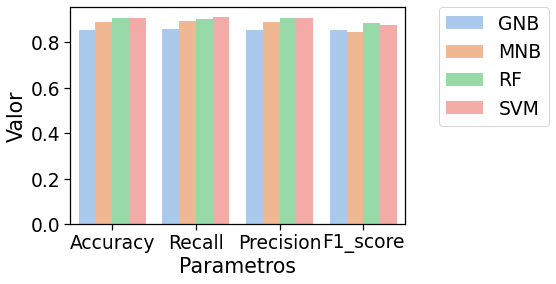

In [ ]:
sns.set_context("notebook", font_scale = 1.7)
# sns.set_theme(style="ticks")
sns.set_palette("pastel")
a = sns.barplot(data = comparacion, x = "Parametros", y = "Valor", hue = "Modelo")
# sns.move_legend(a, "lower center", bbox_to_anchor=(1.2, 0.6), title="Model", frameon=False)
plt.legend(bbox_to_anchor=(1.1, 1), loc='upper left', borderaxespad=0)